In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn.model_selection import train_test_split
%matplotlib inline

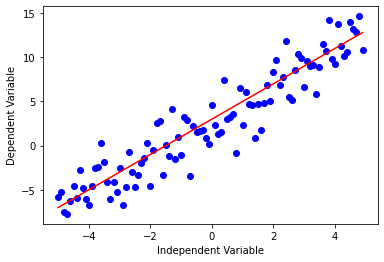

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [3]:
car_data = pd.read_csv('C:/Users/Thales/Downloads/CAR_DETAILS_FROM_CAR_DEKHO.csv')
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Dataset Plotting

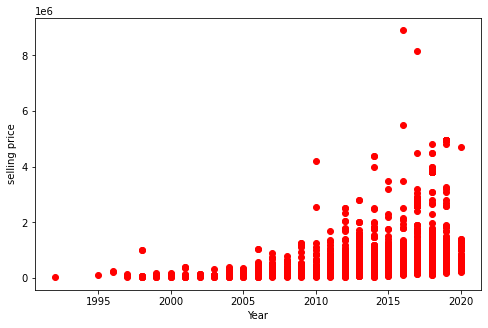

In [6]:
plt.figure(figsize=(8,5))
x_data, y_data = (car_data['year'].values, car_data['selling_price'].values)
plt.plot(x_data, y_data, 'ro') 
plt.ylabel('selling price')
plt.xlabel('Year')
plt.show()

Building the Model

In [7]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

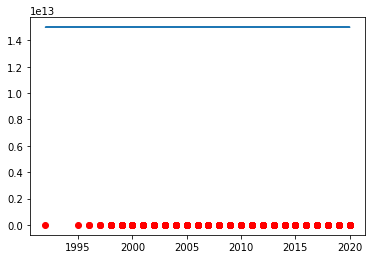

In [8]:
# Assigned beta values randomly
beta_1 = 10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [9]:
#Let's normalize out data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

Model Optimization Using best parametes:
we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.

In [10]:
popt, pcov = scipy.optimize.curve_fit(sigmoid, xdata, ydata)
print("beta_1:", popt[0])
print("beta_2:", popt[1])


beta_1: 51.58028140217807
beta_2: 2.5970080773384105


c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [11]:
np.unique(x_data)

array([1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

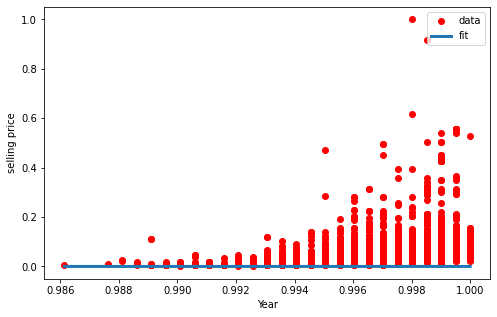

In [12]:
x = np.linspace(1992, 2020, 4340)
x = x/max(x)
plt.figure(figsize=(8,5))
# predict using normalized data
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('selling price')
plt.xlabel('Year')
plt.show()

In [13]:
#evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y - ydata)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y - ydata) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y , ydata) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -122063509012970081298464924228672424150626799903974634022261566822416384.00


In [14]:
msk = np.random.rand(len(car_data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [15]:
# build the model using train set
popt, pcov = scipy.optimize.curve_fit(sigmoid, train_x, train_y)

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [16]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

In [19]:
print (y_hat [0:5])
print (test_x [0:5])
print (test_y [0:5])

[6.92266631e-36 6.42277370e-36 5.39225976e-36 6.10973117e-36
 6.58525929e-36]
[0.99851485 0.9970297  0.99356436 0.9960396  0.99752475]
[0.02808989 0.02696629 0.00674157 0.06741573 0.09550562]


In [18]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -23367274178907300266820930794810140778771843275521112855881008164110336.00


A negative R 2 on your training set typically means you didn't fit an intercept. A negative R 2 on your test set means the model is simply very bad. Indeed flight ID is not a meaningful scalar value and can't be in a linear regression.

**Conslusion:** The R2 score negative value prove that this non linear regression approach is not at suitable for this dataset.